In [1]:
import pandas as pd
import seaborn as sns
import feather
import os
import sys
import platform
import sys
if platform.system()=='Darwin':
    
    sys.path.append('/Users/leupinv/BBC/WP1/data/Code/python/BBC')
    os.chdir('/Volumes/BBC/BBC/WP1/data/EEG/tsk/')
    sys.path.append('/Users/leupinv/BBC/WP1/data/Code/python/BBC')



elif platform.system()=='Windows':
    os.chdir('Z:/BBC/WP1/data/EEG/tsk')

    sys.path.append('C:/Users/Vivi/switchdrive/BBC/WP1/data/Code/python/BBC')
    #os.chdir('c:/Users/Engi/all/BBC/WP1/data/EEG/tsk')
elif platform.system()=='Linux':
    os.chdir('/run/user/1000/gvfs/smb-share:server=bigdata,share=arts/Psycho/BBC/BBC/WP1/data/EEG/tsk'
             )
    #os.chdir('c:/Users/Engi/all/BBC/WP1/data/EEG/tsk')

import pingouin as pg
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import base.base_constants as b_cs
import mne

In [2]:
import beavioral.behavioral_exploration_helper as hp

In [3]:
%load_ext autoreload


%autoreload 2

plt.style.use('default')
import matplotlib as mpl
plt.style.use('default')

mpl.rcParams['svg.fonttype']='none'
mpl.rcParams['text.usetex']=False

## Old code to create dataframe using directly metadata from clean data
df_list=[]
for g_n in b_cs.G_N:
    epo_df=mne.read_epochs(f'preproc/{g_n}/{g_n}_epochs/{g_n}_final/{g_n}_o_tsk_cfa_vep_clean_epo.fif', preload=True)
    
    epo_metadata=epo_df.metadata
    epo_metadata['g_num']=g_n
    df_list.append(epo_metadata)
df_conc=pd.concat(df_list)
df_conc

#saves
path='ana/behavioral/df_o_cleantrials.feather'
filename='/df_o_cleantrials.feather
feather.write_dataframe(df_conc,path)

In [4]:
path='ana/behavioral/df_o_cleantrials.feather'

In [5]:
df=pd.read_feather(path)

In [5]:
df.columns

Index(['TF', 'RT', 'difficulty', 'accuracy', 'awareness', 'cardiac_phase',
       'RRI', 'HeartRate', 'HeartRate_post', 'HeartRate_rolling_5_before',
       'HeartRate_rolling_5_centered', 'HeartRate_rolling_5_after',
       'HeartRateVar_rolling_10_centered', 'HeartRateVar_rolling_100_centered',
       'HeartRate_precedent', 'cardiac_peak', 'rsp_phase',
       'RSP_Rate_precedent', 'rsp_int', 'RSP_Rate', 'RSP_Rate_post',
       'RSP_Rate_rolling_5_before', 'RSP_Rate_rolling_5_centered',
       'RSP_Rate_rolling_5_after', 'RspRateVar_rolling_10_centered',
       'RspRateVar_rolling_100_centered', 'mrk_awa', 'mrk_card_awa',
       'mrk_rsp_awa', 'R_stim_int', 'inh_stim_int', 'mrk_card_awa_RR',
       'mrk_rsp_awa_RR', 'signal_type', 'sys_mask', 'stim_idx',
       'ECG_Phase_Completion_Ventricular', 'ECG_Phase_Completion_Atrial',
       'RSP_Phase_Completion', 'RSP_Amplitude', 'g_num'],
      dtype='object')

In [81]:
df['sys_mask']

2       1.0
6       0.0
10      0.0
14      1.0
18      1.0
       ... 
5837    1.0
5845    1.0
5849    1.0
5857    0.0
5861    1.0
Name: sys_mask, Length: 26711, dtype: float64

In [6]:
df=df[df['difficulty']== 'normal']

df=df[df['sys_mask']== 1]

In [7]:
df

,TF,RT,difficulty,accuracy,awareness,cardiac_phase,RRI,HeartRate,HeartRate_post,HeartRate_rolling_5_before,...,mrk_card_awa_RR,mrk_rsp_awa_RR,signal_type,sys_mask,stim_idx,ECG_Phase_Completion_Ventricular,ECG_Phase_Completion_Atrial,RSP_Phase_Completion,RSP_Amplitude,g_num
2,8944,1625.789062,normal,mistake,unaware,sys,0.967773,61.997982,67.221007,63.357174,...,no_val,no_val,vep,1.0,0.0,-0.571429,0.198917,0.000000,0.000442,g01
18,20183,617.000000,normal,correct,aware,dia,0.957031,62.693878,59.020173,66.399255,...,no_val,no_val,vep,1.0,4.0,0.757911,-0.624490,0.921790,0.000820,g01
22,22632,666.804688,normal,mistake,unaware,sys,0.994141,60.353635,61.195219,61.891594,...,no_val,no_val,vep,1.0,5.0,-0.354467,0.286079,-0.678536,0.000778,g01
26,24458,541.804688,normal,correct,aware,sys,0.907227,66.135630,75.571956,61.271028,...,no_val,no_val,vep,1.0,6.0,-0.919075,0.040698,-0.420517,0.000735,g01
34,29254,817.195312,normal,mistake,unaware,dia,0.859375,69.818182,50.567901,78.580064,...,no_val,no_val,vep,1.0,8.0,0.936449,-0.234483,0.986978,0.000609,g01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5829,5061771,841.609375,normal,correct,unaware,sys,0.695312,86.292135,67.964602,83.536309,...,no_val,no_val,vep,1.0,1456.0,-0.877976,0.074545,0.436318,0.006508,g52
5833,5064348,1008.601562,normal,correct,unaware,sys,0.965820,62.123357,63.800623,73.335964,...,no_val,no_val,vep,1.0,1457.0,-0.827893,0.070991,-0.663087,0.003850,g52
5837,5066976,600.398438,normal,correct,unaware,dia,0.888672,67.516484,67.001091,65.297962,...,no_val,no_val,vep,1.0,1458.0,0.686380,0.985235,-0.049498,0.001472,g52
5845,5072318,526.179688,normal,correct,aware,dia,0.879883,68.190899,66.782609,67.605873,...,no_val,no_val,vep,1.0,1460.0,0.471429,0.820652,0.546823,0.001057,g52


In [9]:
df['accuracy']

2       mistake
18      correct
22      mistake
26      correct
34      mistake
         ...   
5829    correct
5833    correct
5837    correct
5845    correct
5861    correct
Name: accuracy, Length: 16936, dtype: object

In [10]:
df_check=df[df['accuracy']=='correct']

In [11]:
df_check_piv=df_check.pivot_table(index=['g_num'],columns='awareness',values='RT',aggfunc='count')
df_check_piv.reset_index(inplace=True)
df_check_piv

awareness,g_num,aware,unaware
0,g01,187,156
1,g03,250,195
2,g08,112,265
3,g10,197,177
4,g11,242,325
5,g12,229,246
6,g15,251,312
7,g16,213,254
8,g17,205,328
9,g19,244,251


In [12]:
df_check_piv.aware.describe()

count     30.000000
mean     257.066667
std       67.655789
min      112.000000
25%      206.500000
50%      247.000000
75%      304.750000
max      410.000000
Name: aware, dtype: float64

## Create DF which filters out 2.5 centiles from each side of the distribution


In [13]:
list_gn=list()
for g_n in df['g_num'].unique():
    g_df=df[df['g_num']==g_n]
    g_df = g_df[(g_df.RT < g_df.RT.quantile(0.975))
                & (g_df.RT > g_df.RT.quantile(0.025))]

    list_gn.append(g_df)
df_filt=pd.concat(list_gn)

In [14]:
df_filt.columns

Index(['TF', 'RT', 'difficulty', 'accuracy', 'awareness', 'cardiac_phase',
       'RRI', 'HeartRate', 'HeartRate_post', 'HeartRate_rolling_5_before',
       'HeartRate_rolling_5_centered', 'HeartRate_rolling_5_after',
       'HeartRateVar_rolling_10_centered', 'HeartRateVar_rolling_100_centered',
       'HeartRate_precedent', 'cardiac_peak', 'rsp_phase',
       'RSP_Rate_precedent', 'rsp_int', 'RSP_Rate', 'RSP_Rate_post',
       'RSP_Rate_rolling_5_before', 'RSP_Rate_rolling_5_centered',
       'RSP_Rate_rolling_5_after', 'RspRateVar_rolling_10_centered',
       'RspRateVar_rolling_100_centered', 'mrk_awa', 'mrk_card_awa',
       'mrk_rsp_awa', 'R_stim_int', 'inh_stim_int', 'mrk_card_awa_RR',
       'mrk_rsp_awa_RR', 'signal_type', 'sys_mask', 'stim_idx',
       'ECG_Phase_Completion_Ventricular', 'ECG_Phase_Completion_Atrial',
       'RSP_Phase_Completion', 'RSP_Amplitude', 'g_num'],
      dtype='object')

In [15]:
pivot_acc=df_filt.pivot_table(index=['g_num'],columns='accuracy',values='RT',aggfunc='count')
pivot_acc.reset_index(inplace=True)
pivot_acc

accuracy,g_num,correct,mistake
0,g01,322,75
1,g03,424,184
2,g08,360,79
3,g10,354,21
4,g11,543,99
5,g12,450,28
6,g15,531,43
7,g16,444,105
8,g17,505,56
9,g19,470,102


In [16]:
pivot_acc['corr_percentage']=pivot_acc['correct']/(pivot_acc['correct']+pivot_acc['mistake'])

In [89]:
pivot_acc['corr_percentage'].describe()

count    30.000000
mean      0.871698
std       0.063801
min       0.697368
25%       0.828760
50%       0.879164
75%       0.922949
max       0.976939
Name: corr_percentage, dtype: float64

In [59]:
pivot_acc['corr_percentage']

0     0.822261
1     0.708304
2     0.819949
3     0.953451
4     0.837227
5     0.933841
6     0.924855
7     0.798169
8     0.897028
9     0.814270
10    0.867654
11    0.933309
12    0.969499
13    0.812237
14    0.912714
15    0.878299
16    0.835132
17    0.895897
18    0.936237
19    0.838697
20    0.876869
21    0.928971
22    0.944186
23    0.894068
24    0.726499
25    0.860082
26    0.826482
27    0.816073
28    0.886538
29    0.877897
Name: corr_percentage, dtype: float64

## awareness 
for the awareness it is important to know remove the mistakes 

In [17]:
df_filt=df_filt[df_filt['accuracy']=='correct']

In [18]:
df_pivot=df_filt.pivot_table(index=['g_num'],columns='awareness',values='RT',aggfunc='count')
df_pivot.reset_index(inplace=True)
df_pivot

awareness,g_num,aware,unaware
0,g01,177,145
1,g03,244,180
2,g08,101,259
3,g10,183,171
4,g11,236,307
5,g12,219,231
6,g15,239,292
7,g16,208,236
8,g17,193,312
9,g19,231,239


In [19]:
df_pivot.aware.describe()

count     30.000000
mean     243.066667
std       64.972107
min      101.000000
25%      193.000000
50%      237.500000
75%      282.750000
max      391.000000
Name: aware, dtype: float64

In [20]:
df_pivot['awa_ratio']=df_pivot['aware']/(df_pivot['aware']+df_pivot['unaware'])
df_pivot['awa_ratio']

0     0.549689
1     0.575472
2     0.280556
3     0.516949
4     0.434622
5     0.486667
6     0.450094
7     0.468468
8     0.382178
9     0.491489
10    0.737113
11    0.550403
12    0.766094
13    0.473146
14    0.634021
15    0.473373
16    0.577778
17    0.366920
18    0.494094
19    0.338174
20    0.470886
21    0.644397
22    0.603306
23    0.441774
24    0.627078
25    0.652568
26    0.595027
27    0.522046
28    0.590769
29    0.575000
Name: awa_ratio, dtype: float64

In [21]:
df_pivot['awa_ratio'].describe()

count    30.000000
mean      0.525672
std       0.110833
min       0.280556
25%       0.469073
50%       0.519498
75%       0.593962
max       0.766094
Name: awa_ratio, dtype: float64

In [22]:
df_pivot=df_filt.pivot_table(index=['g_num','awareness'],values=['RT'])
df_pivot.reset_index(inplace=True)

In [23]:
df_pivot[df_pivot['awareness']=='aware'].RT.describe()

count      30.000000
mean      736.910816
std       155.199079
min       526.387162
25%       613.572391
50%       722.294055
75%       806.170295
max      1242.441028
Name: RT, dtype: float64

In [24]:
df_pivot[df_pivot['awareness']=='unaware'].RT.describe()

count      30.000000
mean      935.533599
std       353.364180
min       605.293974
25%       752.355941
50%       847.719309
75%       961.959638
max      2257.152887
Name: RT, dtype: float64

In [25]:
df_pivot_card=df_filt.pivot_table(index=['g_num','awareness','cardiac_phase'],values=['RT'])
df_pivot_card.reset_index(inplace=True)

In [26]:
df_pivot_card

,g_num,awareness,cardiac_phase,RT
0,g01,aware,dia,705.057085
1,g01,aware,sys,696.924508
2,g01,unaware,dia,760.073283
3,g01,unaware,sys,767.364231
4,g03,aware,dia,813.804688
...,...,...,...,...
115,g51,unaware,sys,750.067909
116,g52,aware,dia,572.186087
117,g52,aware,sys,580.307699
118,g52,unaware,dia,687.530349


In [27]:
pg.rm_anova(data=df_pivot_card,dv='RT',within=['cardiac_phase','awareness'],subject='g_num')

/opt/anaconda3/envs/mne/lib/python3.12/site-packages/pingouin/distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
/opt/anaconda3/envs/mne/lib/python3.12/site-packages/pingouin/distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,cardiac_phase,1.855308e+03,1,29,1.855308e+03,1.236584,0.275264,0.275264,0.000212,1.0
1,awareness,1.181407e+06,1,29,1.181407e+06,22.064577,0.000059,0.000059,0.119178,1.0
2,cardiac_phase * awareness,3.174584e+01,1,29,3.174584e+01,0.067974,0.796152,0.796152,0.000004,1.0


In [111]:
pg.pairwise_tests(data=df_pivot_card,dv='RT',within=['awareness','cardiac_phase'],subject='g_num', padjust='fdr_bh')

/opt/anaconda3/envs/mne/lib/python3.12/site-packages/pingouin/pairwise.py:593: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stats["Time"].fillna("-", inplace=True)


,Contrast,awareness,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,awareness,-,aware,unaware,True,True,-4.697295,29.0,two-sided,0.000059,NaN,NaN,419.698,-0.716257
1,cardiac_phase,-,dia,sys,True,True,-1.112018,29.0,two-sided,0.275264,NaN,NaN,0.341,-0.031231
2,awareness * cardiac_phase,aware,dia,sys,True,True,-1.327389,29.0,two-sided,0.194736,0.389471,fdr_bh,0.43,-0.043296
3,awareness * cardiac_phase,unaware,dia,sys,True,True,-0.869331,29.0,two-sided,0.391805,0.391805,fdr_bh,0.275,-0.024701


In [64]:
pg.pairwise_tests(data=df_pivot_card,dv='RT',within=['awareness','cardiac_phase'],subject='g_num', padjust='fdr_bh')

,Contrast,awareness,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,awareness,-,aware,unaware,True,True,-5.865080,29.0,two-sided,0.000002,NaN,NaN,8139.227,-0.905427
1,cardiac_phase,-,dia,sys,True,True,-1.470097,29.0,two-sided,0.152302,NaN,NaN,0.512,-0.065844
2,awareness * cardiac_phase,aware,dia,sys,True,True,0.141181,29.0,two-sided,0.888703,0.888703,fdr_bh,0.196,0.008126
3,awareness * cardiac_phase,unaware,dia,sys,True,True,-1.868739,29.0,two-sided,0.071791,0.143581,fdr_bh,0.9,-0.094880


In [113]:
df_pivot_rsp=df_filt.pivot_table(index=['g_num','awareness','rsp_phase'],values=['RT'])
df_pivot_rsp.reset_index(inplace=True)

<Axes: xlabel='awareness', ylabel='RT'>

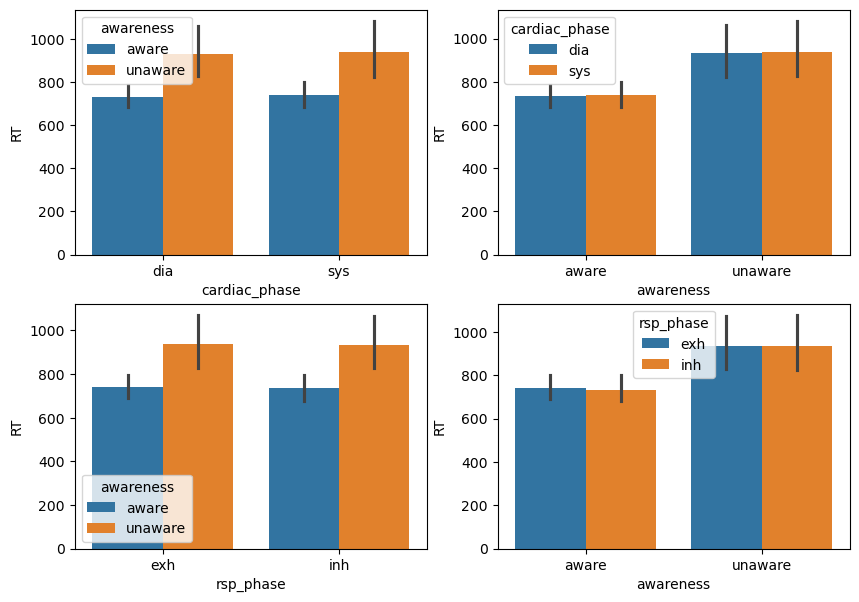

In [115]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,7))
sns.barplot(data=df_pivot_card,y='RT',x='cardiac_phase',hue='awareness',ax=ax1)
sns.barplot(data=df_pivot_card,y='RT',x='awareness',hue='cardiac_phase',ax=ax2)
sns.barplot(data=df_pivot_rsp,y='RT',x='rsp_phase',hue='awareness',ax=ax3)
sns.barplot(data=df_pivot_rsp,y='RT',x='awareness',hue='rsp_phase',ax=ax4)

In [114]:
pg.rm_anova(data=df_pivot_rsp,dv='RT',within=['rsp_phase','awareness'],subject='g_num')

/opt/anaconda3/envs/mne/lib/python3.12/site-packages/pingouin/distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
/opt/anaconda3/envs/mne/lib/python3.12/site-packages/pingouin/distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,rsp_phase,6.259029e+02,1,29,6.259029e+02,0.873539,0.357695,0.357695,0.000072,1.0
1,awareness,1.181552e+06,1,29,1.181552e+06,22.026659,0.000059,0.000059,0.119251,1.0
2,rsp_phase * awareness,1.405416e+02,1,29,1.405416e+02,0.240074,0.627839,0.627839,0.000016,1.0


In [17]:
pg.pairwise_tests(data=df_pivot_rsp,dv='RT',within=['rsp_phase','awareness'],subject='g_num')

,Contrast,rsp_phase,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,rsp_phase,-,exh,inh,True,True,1.303539,29.0,two-sided,2.026450e-01,0.419,0.070715
1,awareness,-,aware,unaware,True,True,-5.933951,29.0,two-sided,1.909509e-06,9695.27,-0.905781
2,rsp_phase * awareness,exh,aware,unaware,True,True,-5.083836,29.0,two-sided,2.009297e-05,1115.221,-0.862432
3,rsp_phase * awareness,inh,aware,unaware,True,True,-6.463918,29.0,two-sided,4.498530e-07,3.701e+04,-0.918588


In [18]:
pg.pairwise_tests(data=df_pivot_rsp,dv='RT',within=['awareness','rsp_phase'],subject='g_num')

,Contrast,awareness,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,awareness,-,aware,unaware,True,True,-5.933951,29.0,two-sided,0.000002,9695.27,-0.905781
1,rsp_phase,-,exh,inh,True,True,1.303539,29.0,two-sided,0.202645,0.419,0.070715
2,awareness * rsp_phase,aware,exh,inh,True,True,0.908613,29.0,two-sided,0.371044,0.284,0.119316
3,awareness * rsp_phase,unaware,exh,inh,True,True,1.016883,29.0,two-sided,0.317618,0.312,0.043734


<AxesSubplot:xlabel='awareness', ylabel='RT'>

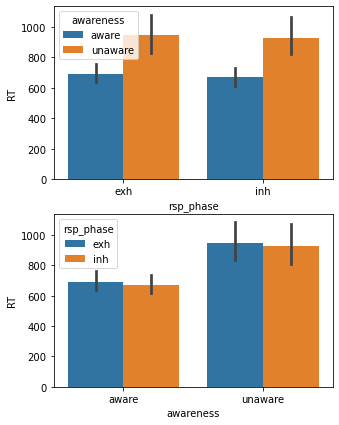

In [19]:
fig,[ax1,ax2]=plt.subplots(2,figsize=(5,7))
sns.barplot(data=df_pivot_rsp,y='RT',x='rsp_phase',hue='awareness',ax=ax1)
sns.barplot(data=df_pivot_rsp,y='RT',x='awareness',hue='rsp_phase',ax=ax2)

# Figure for article

In [136]:
dv='RT'
phy_phase='rsp_phase'
dict_awa_list={}

if phy_phase=='rsp_phase':
    pivot_tab=df_pivot_rsp.copy()
else:
    pivot_tab=df_pivot_card.copy()

for awa in pivot_tab['awareness'].unique():


    awa_df=pivot_tab[pivot_tab['awareness']==awa][[dv,phy_phase]]
    for card in pivot_tab[phy_phase].unique():
        awa_card=awa_df[awa_df[phy_phase]==card]
        mean_card_awa=awa_card[dv].mean()
        sem_card_awa=awa_card[dv].sem()
        dict_awa_list[f'{awa}_{card}']={'mean':mean_card_awa,'sem':sem_card_awa}
        #dict_awa_list.append(dict_awa)



In [137]:
%matplotlib qt
if phy_phase=='rsp_phase':
    color_list=['g','tab:pink','g','tab:pink']
    facecolor_list=['w','w','g','tab:pink']
    xticklab=['Aware', 'Unaware']
    xlab='Awareness'
    cond_list=['aware_inh','aware_exh','unaware_inh','unaware_exh']
else:
    color_list=['tab:orange','b','tab:orange','b']
    facecolor_list=['w','w','tab:orange','b']
    xticklab=['Aware', 'Unaware']
    xlab='Awareness'
    cond_list=['aware_sys','aware_dia','unaware_sys','unaware_dia']


hatch_list=['///','///','','']
adj_list=[0,-0.4,-0.45,-0.85]
#color_list=['tab:orange','tab:orange','b','b']
#facecolor_list=['w','tab:orange','w','b']

alpha_list=[1,0.6,1,0.6]
x=0
fig,ax=plt.subplots(figsize=(9,7))
for cond,color,hatch,adj,facecolor,alpha in zip(cond_list,color_list,hatch_list,adj_list,facecolor_list,alpha_list):


    ax.bar(x=x+adj,height=[dict_awa_list[cond]['mean']],facecolor=facecolor,yerr=[dict_awa_list[cond]['sem']],
            edgecolor=color,hatch=hatch,linewidth=2.5,capsize=(2),ecolor='0.3',
            width=0.5,label=cond.split('_')[0]+' '+cond.split('_')[1],alpha=alpha)
    x+=1



plt.xticks([0.3,1.85],labels=xticklab,size='x-large')
plt.xlabel(xlab,size='x-large')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#plt.title('Interaction effect of cadiac and awaraness condition in the P1')
plt.legend(bbox_to_anchor=(1,1),fontsize='x-large')

fig=plt.gcf()


In [138]:
fig=plt.gcf()

In [135]:
os.getcwd()

'/Volumes/BBC/BBC/WP1/data/EEG/tsk'

In [139]:

fig.savefig(f'ana/results_report/images/barplots/tsk_o_RT_{phy_phase}.svg')

In [7]:
df=pd.concat([df_n_RT,df_o_RT])

In [8]:
df=df[df['sys_mask']==1]
df=df[df['difficulty']=='normal']
df=df[df['accuracy']=='correct']

In [9]:
df

,TF,RT,difficulty,accuracy,awareness,cardiac_phase,rsp_phase,condition,g_num,sys_mask
5,27418,792.781250,normal,correct,aware,sys,exh,n,g01,1.0
6,30055,916.804688,normal,correct,aware,dia,inh,n,g01,1.0
7,32735,874.812500,normal,correct,aware,sys,exh,n,g01,1.0
10,39288,542.781250,normal,correct,aware,dia,exh,n,g01,1.0
11,41558,484.187500,normal,correct,aware,dia,exh,n,g01,1.0
...,...,...,...,...,...,...,...,...,...,...
5854,5076816,1492.000000,normal,correct,aware,sys,exh,o,g52,1.0
5859,5081525,591.609375,normal,correct,unaware,sys,exh,o,g52,1.0
5860,5081789,591.609375,normal,correct,unaware,dia,exh,o,g52,1.0
5861,5081825,591.609375,normal,correct,unaware,sys,exh,o,g52,1.0


In [10]:
df

,TF,RT,difficulty,accuracy,awareness,cardiac_phase,rsp_phase,condition,g_num,sys_mask
5,27418,792.781250,normal,correct,aware,sys,exh,n,g01,1.0
6,30055,916.804688,normal,correct,aware,dia,inh,n,g01,1.0
7,32735,874.812500,normal,correct,aware,sys,exh,n,g01,1.0
10,39288,542.781250,normal,correct,aware,dia,exh,n,g01,1.0
11,41558,484.187500,normal,correct,aware,dia,exh,n,g01,1.0
...,...,...,...,...,...,...,...,...,...,...
5854,5076816,1492.000000,normal,correct,aware,sys,exh,o,g52,1.0
5859,5081525,591.609375,normal,correct,unaware,sys,exh,o,g52,1.0
5860,5081789,591.609375,normal,correct,unaware,dia,exh,o,g52,1.0
5861,5081825,591.609375,normal,correct,unaware,sys,exh,o,g52,1.0


In [11]:
df_pivot=df.pivot_table(index=['g_num','awareness','condition'],values=['RT'])
df_pivot.reset_index(inplace=True)

In [18]:
df_pivot_ex=df_pivot[df_pivot['g_num']!='g37']

In [20]:
df_pivot_ex

,g_num,awareness,condition,RT
0,g01,aware,n,699.682292
1,g01,aware,o,576.701016
2,g01,unaware,n,846.046832
3,g01,unaware,o,667.225328
4,g03,aware,n,746.193666
...,...,...,...,...
115,g51,unaware,o,775.471680
116,g52,aware,n,728.501058
117,g52,aware,o,607.600586
118,g52,unaware,n,868.313308


In [7]:
df_n_pivot=df_n.pivot_table(index=['g_num'],columns='awareness',values='RT')
df_n_pivot.reset_index(inplace=True)

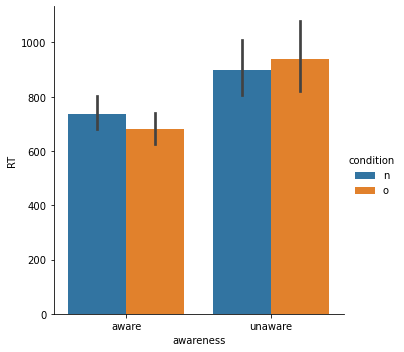

In [12]:
sns.catplot(data=df_pivot,y='RT',x='awareness',hue='condition',kind='bar')

In [13]:
pg.rm_anova(data=df_pivot,dv='RT',within=['condition','awareness'],subject='g_num')

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,condition,3.167604e+03,1,29,3.167604e+03,0.064266,8.016647e-01,8.016647e-01,0.000402,1.0
1,awareness,1.321838e+06,1,29,1.321838e+06,51.822858,6.331324e-08,6.331324e-08,0.143768,1.0
2,condition * awareness,6.905238e+04,1,29,6.905238e+04,5.423921,2.703668e-02,2.703668e-02,0.008695,1.0


In [14]:
pg.pairwise_tests(data=df_pivot,dv='RT',within=['condition','awareness'],subject='g_num')

,Contrast,condition,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,condition,-,n,o,True,True,0.253507,29.0,two-sided,8.016647e-01,0.2,0.042002
1,awareness,-,aware,unaware,True,True,-7.198810,29.0,two-sided,6.331324e-08,2.302e+05,-0.905421
2,condition * awareness,n,aware,unaware,True,True,-6.523924,29.0,two-sided,3.825080e-07,4.303e+04,-0.671071
3,condition * awareness,o,aware,unaware,True,True,-5.865391,29.0,two-sided,2.305749e-06,8145.661,-0.905560


In [19]:
pg.pairwise_tests(data=df_pivot_ex,dv='RT',within=['awareness','condition'],subject='g_num')

,Contrast,awareness,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,awareness,-,aware,unaware,True,True,-7.086375,28.0,two-sided,1.039869e-07,1.45e+05,-0.903011
1,condition,-,n,o,True,True,0.208201,28.0,two-sided,8.365792e-01,0.201,0.035080
2,awareness * condition,aware,n,o,True,True,1.884724,28.0,two-sided,6.988618e-02,0.932,0.333574
3,awareness * condition,unaware,n,o,True,True,-0.683563,28.0,two-sided,4.998691e-01,0.245,-0.119461


In [26]:
col_dv_group=['RT',
              'HeartRateVar_rolling_10_centered', 'HeartRateVar_rolling_100_centered',
            'HeartRate',
              'RSP_Rate', 
              'RspRateVar_rolling_10_centered',
              'RspRateVar_rolling_100_centered','RSP_Amplitude','mean_int',
              'TAS-20', 'STAI-Y',
              'NEO-FFI N', 'NEO FFI E', 'NEO FFI O', 'NEO FFI A', 'NEO FFI C', 'BPQ','Age','Sexe: ', 'CACU_corr', 'corr', 'CACU_sys', 'CACU_dia']

In [ ]:
df=df[df['sys_mask']==1]
df=df[df['difficulty']=='normal']

In [ ]:
pivot_gen=df.pivot_table(index=['g_num'],values=col_dv_group)
pivot_gen.reset_index(inplace=True)
pivot_gen

In [ ]:
fileout='/behav_group.csv'
outname=path+fileout
outname

In [26]:
pivot_gen.to_csv(outname)

In [18]:
feather.write_dataframe(pivot_gen,fileout)

OSError: [Errno 30] Failed to open local file '/behav_group.feather'. Detail: [errno 30] Read-only file system

## Accuracy analyses

In [66]:
df_o=df_o[df_o['sys_mask']==1]
df_o=df_o[df_o['difficulty']=='normal']


In [67]:
pivot_acc=df_o.pivot_table(index=['g_num'],columns='accuracy',values='RT',aggfunc='count')
pivot_acc.reset_index(inplace=True)
pivot_acc

accuracy,g_num,correct,mistake
0,g01,1976,422
1,g03,2072,876
2,g08,1694,381
3,g10,1882,91
4,g11,2364,480
5,g12,2979,212
6,g15,2355,196
7,g16,2028,508
8,g17,2264,268
9,g19,2256,548


In [69]:
pivot_acc['corr_percentage']=pivot_acc['correct']/(pivot_acc['correct']+pivot_acc['mistake'])
pivot_acc.fillna(1,inplace=True)

In [70]:
pivot_acc.describe()

accuracy,correct,mistake,corr_percentage
count,30.000000,30.000000,30.000000
mean,2271.200000,360.900000,0.864500
std,444.141124,191.453308,0.063131
min,1444.000000,91.000000,0.702849
25%,1974.500000,206.000000,0.824270
50%,2266.000000,307.500000,0.873931
75%,2420.250000,469.000000,0.918685
max,3283.000000,876.000000,0.962311


In [26]:
pivot_card_acc=df_o.pivot_table(index=['g_num','cardiac_phase'],columns='accuracy',values='RT',aggfunc='count')
pivot_card_acc.reset_index(inplace=True)
pivot_card_acc

accuracy,g_num,cardiac_phase,correct,mistake
0,g01,dia,994,205
1,g01,sys,982,217
2,g03,dia,1064,435
3,g03,sys,1008,441
4,g08,dia,819,183
5,g08,sys,875,198
6,g10,dia,938,40
7,g10,sys,944,51
8,g11,dia,1179,234
9,g11,sys,1185,246


In [27]:
pivot_card_acc['corr_percentage']=pivot_card_acc['correct']/(pivot_card_acc['correct']+pivot_card_acc['mistake'])
pivot_card_acc.fillna(1,inplace=True)

In [28]:
piv_sys=pivot_card_acc[pivot_card_acc['cardiac_phase']=='sys']
piv_dia=pivot_card_acc[pivot_card_acc['cardiac_phase']=='dia']

In [29]:
pg.ttest(piv_sys['corr_percentage'],piv_dia['corr_percentage'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.138826,58,two-sided,0.890068,"[-0.04, 0.03]",0.035845,0.265,0.052138


In [32]:
pivot_rsp_acc=df_o.pivot_table(index=['g_num','rsp_phase'],columns='accuracy',values='RT',aggfunc='count')
pivot_rsp_acc.reset_index(inplace=True)
pivot_rsp_acc

accuracy,g_num,rsp_phase,correct,mistake
0,g01,exh,923,225
1,g01,inh,1053,197
2,g03,exh,843,401
3,g03,inh,1229,475
4,g08,exh,771,142
5,g08,inh,923,239
6,g10,exh,1060,58
7,g10,inh,822,33
8,g11,exh,1360,255
9,g11,inh,1004,225


In [34]:
pivot_rsp_acc['corr_percentage']=pivot_card_acc['correct']/(pivot_card_acc['correct']+pivot_card_acc['mistake'])
pivot_rsp_acc.fillna(1,inplace=True)

In [36]:
piv_inh=pivot_rsp_acc[pivot_rsp_acc['rsp_phase']=='inh']
piv_exh=pivot_rsp_acc[pivot_rsp_acc['rsp_phase']=='exh']

In [37]:
pg.ttest(piv_inh['corr_percentage'],piv_exh['corr_percentage'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.138826,58,two-sided,0.890068,"[-0.04, 0.03]",0.035845,0.265,0.052138


# distributions analysis

In [28]:
#path='ana/behavioral'
#filename='/behav_df.feather'
df=pd.read_feather(path+filename_o)


In [29]:
df=df[df['sys_mask']==1]
df=df[df['difficulty']=='normal']
df=df[df['accuracy']=='correct']
df=df[df['signal_type']=='vep']

In [30]:

DV_type='RT'

if DV_type =='RT':
    aggfunc='mean'
    ylab='RT (ms)'

elif DV_type=='dist':
    aggfunc='count'
    ylab='n of trials'
else:
    print(f'invalid entry: {DV_type}')


In [31]:

pivot_card=df.pivot_table(index=['g_num','awareness','cardiac_phase'],values='RT',aggfunc=aggfunc)
pivot_card.reset_index(inplace=True)

In [32]:
pivot_card

,g_num,awareness,cardiac_phase,RT
0,g01,aware,dia,693.048900
1,g01,aware,sys,706.279175
2,g01,unaware,dia,814.282609
3,g01,unaware,sys,834.722926
4,g03,aware,dia,850.726058
...,...,...,...,...
115,g51,unaware,sys,765.465009
116,g52,aware,dia,575.251953
117,g52,aware,sys,575.719188
118,g52,unaware,dia,810.090382


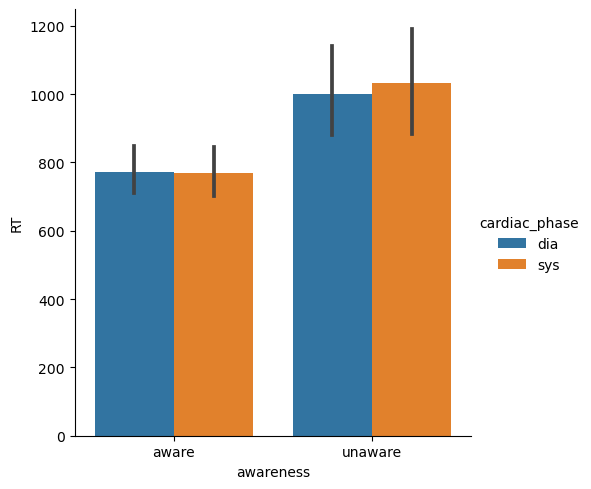

In [33]:
sns.catplot(data=pivot_card,x='awareness',y='RT',kind='bar',hue='cardiac_phase')

In [34]:
pg.rm_anova(data=pivot_card,within=['awareness','cardiac_phase'],dv='RT',subject='g_num',effsize='np2')

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,awareness,1.814634e+06,1,29,1.814634e+06,26.194732,0.000018,0.000018,0.474588,1.0
1,cardiac_phase,6.135588e+03,1,29,6.135588e+03,0.513877,0.479200,0.479200,0.017411,1.0
2,awareness * cardiac_phase,7.893806e+03,1,29,7.893806e+03,0.784092,0.383176,0.383176,0.026326,1.0


In [35]:
pg.pairwise_tests(data=pivot_card,within=['awareness','cardiac_phase'],dv='RT',subject='g_num')

,Contrast,awareness,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,awareness,-,aware,unaware,True,True,-5.118079,29.0,two-sided,0.000018,1216.528,-0.793000
1,cardiac_phase,-,dia,sys,True,True,-0.716852,29.0,two-sided,0.479200,0.246,-0.050102
2,awareness * cardiac_phase,aware,dia,sys,True,True,0.063124,29.0,two-sided,0.950101,0.195,0.009879
3,awareness * cardiac_phase,unaware,dia,sys,True,True,-1.311204,29.0,two-sided,0.200077,0.422,-0.074937


In [36]:
pivot_rsp=df.pivot_table(index=['g_num','awareness','rsp_phase'],values='RT',aggfunc=aggfunc)
pivot_rsp.reset_index(inplace=True)

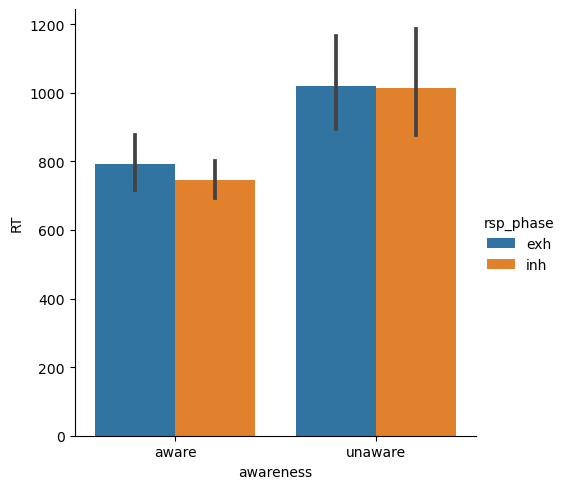

In [37]:
sns.catplot(data=pivot_rsp,x='awareness',y='RT',kind='bar',hue='rsp_phase')

In [38]:
pg.rm_anova(data=pivot_rsp,within=['awareness','rsp_phase'],dv='RT',subject='g_num',effsize='np2')

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,awareness,1.847162e+06,1,29,1.847162e+06,25.589510,0.000022,0.000022,0.468762,1.0
1,rsp_phase,1.815203e+04,1,29,1.815203e+04,1.772027,0.193502,0.193502,0.057586,1.0
2,awareness * rsp_phase,1.181805e+04,1,29,1.181805e+04,1.020878,0.320667,0.320667,0.034006,1.0


In [39]:
pg.pairwise_ttests(data=pivot_rsp,within=['awareness','rsp_phase'],dv='RT',subject='g_num')

/Applications/anaconda3/envs/mne_24/lib/python3.9/site-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,awareness,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,awareness,-,aware,unaware,True,True,-5.058607,29.0,two-sided,0.000022,1046.049,-0.791360
1,rsp_phase,-,exh,inh,True,True,1.331175,29.0,two-sided,0.193502,0.432,0.085680
2,awareness * rsp_phase,aware,exh,inh,True,True,1.427604,29.0,two-sided,0.164086,0.485,0.226482
3,awareness * rsp_phase,unaware,exh,inh,True,True,0.215615,29.0,two-sided,0.830797,0.199,0.011544


In [64]:
pivot_rsp

,g_num,awareness,rsp_phase,RT
0,g01,aware,exh,576.749178
1,g01,aware,inh,576.661368
2,g01,unaware,exh,666.819946
3,g01,unaware,inh,667.606864
4,g03,aware,exh,683.646605
...,...,...,...,...
115,g51,unaware,inh,789.004195
116,g52,aware,exh,638.536142
117,g52,aware,inh,560.239823
118,g52,unaware,exh,930.469701


In [40]:
pivot_rsp_diff=df.pivot_table(index=['g_num','awareness'],columns='rsp_phase',values='RT',aggfunc=aggfunc)
pivot_rsp_diff.reset_index(inplace=True)
pivot_rsp_diff

rsp_phase,g_num,awareness,exh,inh
0,g01,aware,702.912672,696.700970
1,g01,unaware,840.434043,809.333157
2,g03,aware,838.514302,815.422639
3,g03,unaware,969.812976,947.680847
4,g08,aware,797.197645,723.093110
5,g08,unaware,870.278460,866.449119
6,g10,aware,811.562885,796.327714
7,g10,unaware,1002.445731,985.615492
8,g11,aware,540.782703,535.721862
9,g11,unaware,669.532694,611.354248


In [41]:
pivot_rsp_diff['rsp_diff']=pivot_rsp_diff['exh']-pivot_rsp_diff['inh']
pivot_rsp_diff

rsp_phase,g_num,awareness,exh,inh,rsp_diff
0,g01,aware,702.912672,696.700970,6.211702
1,g01,unaware,840.434043,809.333157,31.100886
2,g03,aware,838.514302,815.422639,23.091663
3,g03,unaware,969.812976,947.680847,22.132129
4,g08,aware,797.197645,723.093110,74.104535
5,g08,unaware,870.278460,866.449119,3.829341
6,g10,aware,811.562885,796.327714,15.235171
7,g10,unaware,1002.445731,985.615492,16.830239
8,g11,aware,540.782703,535.721862,5.060842
9,g11,unaware,669.532694,611.354248,58.178446


In [51]:

DV_type='dist'

if DV_type =='RT':
    aggfunc='mean'
    ylab='RT (ms)'

elif DV_type=='dist':
    aggfunc='count'
    ylab='n of trials'
else:
    print(f'invalid entry: {DV_type}')


In [52]:
pivot_rsp=df_o.pivot_table(index=['g_num','awareness','rsp_phase'],values='RT',aggfunc=aggfunc)
pivot_rsp.reset_index(inplace=True)

In [53]:

pivot_card=df_o.pivot_table(index=['g_num','awareness','cardiac_phase'],values='RT',aggfunc=aggfunc)
pivot_card.reset_index(inplace=True)

In [57]:
dv='RT'
phy_phase='cardiac_phase'
dict_awa_list={}

if phy_phase=='rsp_phase':
    pivot_tab=pivot_rsp.copy()
else:
    pivot_tab=pivot_card.copy()

for awa in pivot_tab['awareness'].unique():
    
    
    awa_df=pivot_tab[pivot_tab['awareness']==awa][[dv,phy_phase]]
    for card in pivot_tab[phy_phase].unique():
        awa_card=awa_df[awa_df[phy_phase]==card]
        mean_card_awa=awa_card.mean()[dv]
        sem_card_awa=awa_card.sem()[dv]
        dict_awa_list[f'{awa}_{card}']={'mean':mean_card_awa,'sem':sem_card_awa}
        #dict_awa_list.append(dict_awa)



/var/folders/n_/wqyb7zpj4pz55w1npp63xcl8nbkzsc/T/ipykernel_29436/3056648032.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_card_awa=awa_card.mean()[dv]
/var/folders/n_/wqyb7zpj4pz55w1npp63xcl8nbkzsc/T/ipykernel_29436/3056648032.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sem_card_awa=awa_card.sem()[dv]
/var/folders/n_/wqyb7zpj4pz55w1npp63xcl8nbkzsc/T/ipykernel_29436/3056648032.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_card_awa=awa_card.mean()[dv]
/va

In [58]:
%matplotlib qt
if phy_phase=='rsp_phase':
    color_list=['g','tab:pink','g','tab:pink']
    facecolor_list=['w','w','g','tab:pink']
    xticklab=['Aware', 'Unaware']
    xlab='Awareness'
    cond_list=['aware_inh','aware_exh','unaware_inh','unaware_exh']
else:
    color_list=['tab:orange','b','tab:orange','b']
    facecolor_list=['w','w','tab:orange','b']
    xticklab=['Aware', 'Unaware']
    xlab='Awareness'
    cond_list=['aware_sys','aware_dia','unaware_sys','unaware_dia']
    
    
hatch_list=['///','///','','']
adj_list=[0,-0.4,-0.45,-0.85]
#color_list=['tab:orange','tab:orange','b','b']
#facecolor_list=['w','tab:orange','w','b']

alpha_list=[1,0.6,1,0.6]
x=0
fig,ax=plt.subplots(figsize=(9,7))
for cond,color,hatch,adj,facecolor,alpha in zip(cond_list,color_list,hatch_list,adj_list,facecolor_list,alpha_list):
    
    
    ax.bar(x=x+adj,height=[dict_awa_list[cond]['mean']],facecolor=facecolor,yerr=[dict_awa_list[cond]['sem']],
            edgecolor=color,hatch=hatch,linewidth=2.5,capsize=(2),ecolor='0.3',
            width=0.5,label=cond.split('_')[0]+' '+cond.split('_')[1],alpha=alpha)
    x+=1
    


plt.xticks([0.3,1.85],labels=xticklab,size='x-large')
plt.xlabel(xlab,size='x-large')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel(ylab,size='x-large')
#plt.title('Interaction effect of cadiac and awaraness condition in the P1')
plt.legend(bbox_to_anchor=(1,1),fontsize='x-large')

fig=plt.gcf()


In [59]:
png=f'tsk_o_{DV_type}_int_{phy_phase}Xawa.svg'
fig_path=f'ana/results_report/images/barplots/{png}'

fig.savefig(fig_path,dpi=1200,bbox_inches='tight',format='svg')

In [34]:

pivot_whole=df.pivot_table(index=['g_num','awareness','cardiac_phase','rsp_phase'],values='RT',aggfunc=aggfunc)
pivot_whole.reset_index(inplace=True)

In [36]:
sns.catplot(data=pivot_whole,x='rsp_phase',y='RT',kind='bar',hue='cardiac_phase',col='awareness')

# Binning

In [62]:
path='ana/behavioral'
filename='/behav_df.feather'
df=pd.read_feather(path+filename)

In [63]:

df=df[df['difficulty']=='normal']
df=df[df['accuracy']=='correct']

In [64]:
df.columns

Index(['TF', 'RT', 'difficulty', 'accuracy', 'awareness', 'cardiac_phase',
       'RRI', 'HeartRate', 'HeartRate_post', 'HeartRate_rolling_5_before',
       'HeartRate_rolling_5_centered', 'HeartRate_rolling_5_after',
       'HeartRateVar_rolling_10_centered', 'HeartRateVar_rolling_100_centered',
       'HeartRate_precedent', 'cardiac_peak', 'rsp_phase',
       'RSP_Rate_precedent', 'rsp_int', 'RSP_Rate', 'RSP_Rate_post',
       'RSP_Rate_rolling_5_before', 'RSP_Rate_rolling_5_centered',
       'RSP_Rate_rolling_5_after', 'RspRateVar_rolling_10_centered',
       'RspRateVar_rolling_100_centered', 'mrk_awa', 'mrk_card_awa',
       'mrk_rsp_awa', 'R_stim_int', 'inh_stim_int', 'mrk_card_awa_RR',
       'mrk_rsp_awa_RR', 'signal_type', 'sys_mask', 'stim_idx',
       'ECG_Phase_Completion_Ventricular', 'ECG_Phase_Completion_Atrial',
       'RSP_Phase_Completion', 'RSP_Amplitude', 'g_num', 'condition',
       'CACU_corr', 'corr', 'CACU_sys', 'CACU_dia', 'TAS-20', 'STAI-Y',
       'NEO-FFI N'

In [62]:
labels=['very low','low','medium','high','very high']
df['ECG_phase_qcut']=pd.qcut(df['ECG_Phase_Completion_Atrial'],5,labels=labels)

KeyError: 'ECG_Phase_Completion_Atrial'

In [66]:

DV_type='RT'

if DV_type =='RT':
    aggfunc='mean'
    ylab='RT (ms)'

elif DV_type=='dist':
    aggfunc='count'
    ylab='n of trials'
else:
    print(f'invalid entry: {DV_type}')


In [67]:

pivot_card=df.pivot_table(index=['g_num','awareness','ECG_phase_qcut'],values='RT',aggfunc=aggfunc)
pivot_card.reset_index(inplace=True)

In [68]:
pivot_card.ECG_phase_qcut.value_counts()

very low     60
low          60
medium       60
high         60
very high    60
Name: ECG_phase_qcut, dtype: int64

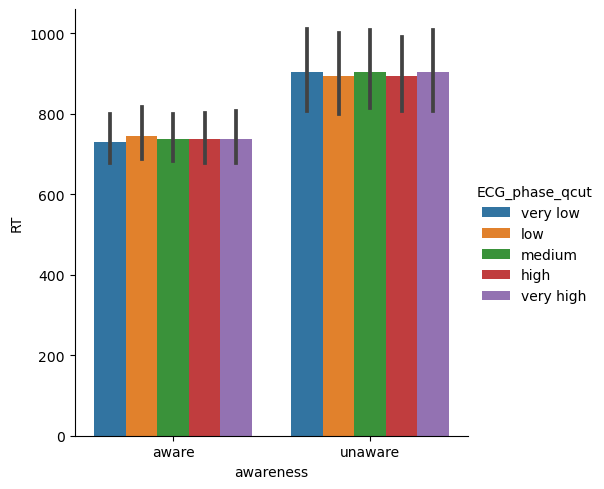

In [69]:
sns.catplot(data=pivot_card,x='awareness',y='RT',kind='bar',hue='ECG_phase_qcut')

In [70]:
pg.rm_anova(data=pivot_card,within=['awareness','ECG_phase_qcut'],dv='RT',subject='g_num',effsize='np2')

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,awareness,1.980226e+06,1,29,1.980226e+06,42.411572,3.945804e-07,3.945804e-07,0.593903,1.000000
1,ECG_phase_qcut,1.146908e+03,4,116,2.867269e+02,0.203115,9.362125e-01,9.008114e-01,0.006955,0.781934
2,awareness * ECG_phase_qcut,4.786040e+03,4,116,1.196510e+03,0.940832,4.430157e-01,4.241667e-01,0.031423,0.745494


In [71]:
pg.pairwise_tests(data=pivot_card,within=['awareness','ECG_phase_qcut'],dv='RT',subject='g_num',correction=True)

,Contrast,awareness,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,awareness,-,aware,unaware,True,True,-6.512417,29.0,two-sided,3.945804e-07,4.181e+04,-0.682362
1,ECG_phase_qcut,-,high,low,True,True,-0.483976,29.0,two-sided,6.320378e-01,0.217,-0.017553
2,ECG_phase_qcut,-,high,medium,True,True,-0.681598,29.0,two-sided,5.009008e-01,0.241,-0.023720
3,ECG_phase_qcut,-,high,very high,True,True,-0.664545,29.0,two-sided,5.115919e-01,0.238,-0.022851
4,ECG_phase_qcut,-,high,very low,True,True,-0.320104,29.0,two-sided,7.511846e-01,0.204,-0.010772
5,ECG_phase_qcut,-,low,medium,True,True,-0.224246,29.0,two-sided,8.241383e-01,0.199,-0.005632
6,ECG_phase_qcut,-,low,very high,True,True,-0.137081,29.0,two-sided,8.919140e-01,0.196,-0.004712
7,ECG_phase_qcut,-,low,very low,True,True,0.245063,29.0,two-sided,8.081338e-01,0.2,0.006526
8,ECG_phase_qcut,-,medium,very high,True,True,0.047684,29.0,two-sided,9.622950e-01,0.195,0.000959
9,ECG_phase_qcut,-,medium,very low,True,True,0.478920,29.0,two-sided,6.355873e-01,0.216,0.012263


# Breathing

In [72]:

df=df[df['difficulty']=='normal']
df=df[df['accuracy']=='correct']

In [73]:
df.columns

Index(['TF', 'RT', 'difficulty', 'accuracy', 'awareness', 'cardiac_phase',
       'RRI', 'HeartRate', 'HeartRate_post', 'HeartRate_rolling_5_before',
       'HeartRate_rolling_5_centered', 'HeartRate_rolling_5_after',
       'HeartRateVar_rolling_10_centered', 'HeartRateVar_rolling_100_centered',
       'HeartRate_precedent', 'cardiac_peak', 'rsp_phase',
       'RSP_Rate_precedent', 'rsp_int', 'RSP_Rate', 'RSP_Rate_post',
       'RSP_Rate_rolling_5_before', 'RSP_Rate_rolling_5_centered',
       'RSP_Rate_rolling_5_after', 'RspRateVar_rolling_10_centered',
       'RspRateVar_rolling_100_centered', 'mrk_awa', 'mrk_card_awa',
       'mrk_rsp_awa', 'R_stim_int', 'inh_stim_int', 'mrk_card_awa_RR',
       'mrk_rsp_awa_RR', 'signal_type', 'sys_mask', 'stim_idx',
       'ECG_Phase_Completion_Ventricular', 'ECG_Phase_Completion_Atrial',
       'RSP_Phase_Completion', 'RSP_Amplitude', 'g_num', 'condition',
       'CACU_corr', 'corr', 'CACU_sys', 'CACU_dia', 'TAS-20', 'STAI-Y',
       'NEO-FFI N'

In [84]:
labels=['very low','low','medium','high','very high']
df['RSP_phase_qcut']=pd.qcut(df['RSP_Phase_Completion'],5)

/Applications/anaconda3/envs/mne_1_3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RSP_Phase_Completion', ylabel='Density'>

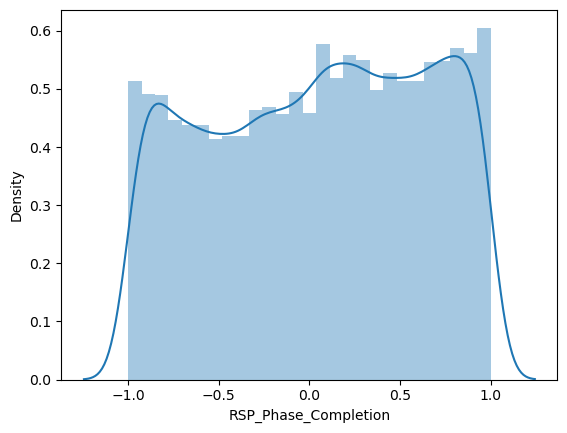

In [77]:
sns.distplot(df['RSP_Phase_Completion'])

In [85]:
df['RSP_phase_qcut'].value_counts()

(-1.001, -0.577]    3835
(0.648, 1.0]        3835
(-0.577, -0.12]     3834
(-0.12, 0.264]      3834
(0.264, 0.648]      3834
Name: RSP_phase_qcut, dtype: int64

In [79]:

DV_type='RT'

if DV_type =='RT':
    aggfunc='mean'
    ylab='RT (ms)'

elif DV_type=='dist':
    aggfunc='count'
    ylab='n of trials'
else:
    print(f'invalid entry: {DV_type}')


In [80]:

pivot_card=df.pivot_table(index=['g_num','awareness','RSP_phase_qcut'],values='RT',aggfunc=aggfunc)
pivot_card.reset_index(inplace=True)

In [38]:
#pivot_card.ECG_phase_qcut.value_counts()

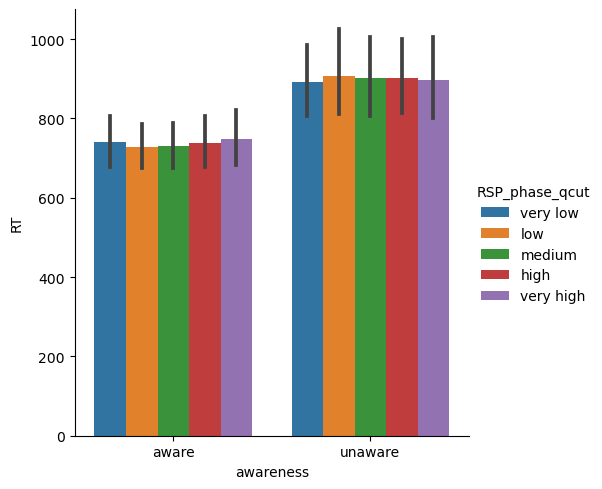

In [81]:
sns.catplot(data=pivot_card,x='awareness',y='RT',kind='bar',hue='RSP_phase_qcut')

In [82]:
pg.rm_anova(data=pivot_card,within=['awareness','RSP_phase_qcut'],dv='RT',subject='g_num',effsize='np2')

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,awareness,1.988724e+06,1,29,1.988724e+06,44.049226,2.820817e-07,2.820817e-07,0.603007,1.000000
1,RSP_phase_qcut,2.048355e+03,4,116,5.120887e+02,0.420298,7.937246e-01,7.505550e-01,0.014286,0.796508
2,awareness * RSP_phase_qcut,9.782473e+03,4,116,2.445618e+03,1.663338,1.632334e-01,1.938684e-01,0.054245,0.567634


In [83]:
pg.pairwise_tests(data=pivot_card,within=['awareness','RSP_phase_qcut'],dv='RT',subject='g_num')

,Contrast,awareness,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,awareness,-,aware,unaware,True,True,-6.636959,29.0,two-sided,2.820817e-07,5.712e+04,-0.685392
1,RSP_phase_qcut,-,high,low,True,True,0.346097,29.0,two-sided,7.317682e-01,0.206,0.010742
2,RSP_phase_qcut,-,high,medium,True,True,0.712044,29.0,two-sided,4.821273e-01,0.246,0.016815
3,RSP_phase_qcut,-,high,very high,True,True,-0.386880,29.0,two-sided,7.016698e-01,0.208,-0.011670
4,RSP_phase_qcut,-,high,very low,True,True,0.846218,29.0,two-sided,4.043600e-01,0.27,0.019591
5,RSP_phase_qcut,-,low,medium,True,True,0.170573,29.0,two-sided,8.657438e-01,0.197,0.005680
6,RSP_phase_qcut,-,low,very high,True,True,-0.691432,29.0,two-sided,4.947923e-01,0.242,-0.021845
7,RSP_phase_qcut,-,low,very low,True,True,0.299876,29.0,two-sided,7.664110e-01,0.203,0.008393
8,RSP_phase_qcut,-,medium,very high,True,True,-1.029653,29.0,two-sided,3.116847e-01,0.315,-0.027978
9,RSP_phase_qcut,-,medium,very low,True,True,0.160015,29.0,two-sided,8.739788e-01,0.197,0.002779


# Between subjects directions 

In [8]:

pivot_card=df.pivot_table(index=['g_num','awareness','cardiac_phase'],values='RT')
pivot_card.reset_index(inplace=True)

NameError: name 'pivot_tab' is not defined

In [7]:
dv='RT'
phy_phase='cardiac_phase'
dict_awa_list={}

if phy_phase=='rsp_phase':
    pivot_tab=pivot_rsp.copy()
else:
    pivot_tab=pivot_card.copy()

for awa in pivot_tab['awareness'].unique():
    
    
    awa_df=pivot_tab[pivot_tab['awareness']==awa][[dv,phy_phase]]
    for card in pivot_tab[phy_phase].unique():
        awa_card=awa_df[awa_df[phy_phase]==card]
        dict_awa_list[f'{awa}_{card}']=awa_card['RT'].to_list()
        #dict_awa_list.append(dict_awa)

dict_awa_list

{'aware_dia': [697.337389380531,
  742.9096746575342,
  703.6852678571429,
  644.6026870265151,
  537.21484375,
  731.810211489899,
  633.7867726293103,
  786.048887310606,
  581.3597898230089,
  618.377348265896,
  600.1872888513514,
  581.1015625,
  512.546875,
  879.6802884615385,
  869.8701410060976,
  546.8490366541354,
  933.8117233187135,
  740.3358577806123,
  799.7308968321918,
  669.734375,
  1341.8156910211267,
  732.3085443037975,
  1004.6531587230215,
  1016.6783088235294,
  765.3561197916666,
  732.7581676136364,
  632.042592243976,
  555.255454009434,
  732.6647245762712,
  742.8187342171717],
 'aware_sys': [702.254854368932,
  749.3274101307189,
  669.5755365210844,
  665.8477873322148,
  542.8326480263158,
  742.9382659313726,
  609.6491477272727,
  798.9918448464912,
  606.7803591008771,
  573.0980902777778,
  618.1039402173913,
  592.0,
  511.6637575511152,
  900.3984375,
  899.8634510869565,
  555.4525486680328,
  913.3955965909091,
  725.6377910539215,
  842.979712

In [ ]:
dict_awa_list.keys()

In [8]:
adj_list=[0,-0.4,-0.45,-0.85]

In [ ]:
dict_awa_list['aware_dia'][n]

In [ ]:
fig,ax= plt.subplots()
x_val=0

for cond,rt in dict_awa_list.items():
    x_arr=np.full(len(rt),x_val+adj_list[x_val])
    ax.plot(x_arr,rt,'o',alpha=.4, label=cond)

    
    x_val+=1
xticklab=['Aware', 'Unaware']
xlab='Awareness'
plt.xticks([0.3,1.85],labels=xticklab,size='x-large')
plt.xlabel(xlab,size='x-large')
ax.legend()
count_awa_dia=0
count_unawa_dia=0
for n, _ in enumerate(rt):
    diff_n_awa=np.array(dict_awa_list['aware_dia'])[n]-np.array(dict_awa_list['aware_sys'])[n]
    diff_n_unawa=dict_awa_list['unaware_dia'][n]-dict_awa_list['unaware_sys'][n]

    if diff_n_awa>0:
        color_line_awa='g'
        count_awa_dia+=1
        
    else:
        color_line_awa='r'
        
    if diff_n_unawa>0:
        color_line_unawa='g'
        count_unawa_dia+=1
    else:
        color_line_unawa='r'        
    
    ax.plot([0+adj_list[0],1+adj_list[1]],[dict_awa_list['aware_dia'][n],dict_awa_list['aware_sys'][n]],color=color_line_awa,linestyle='--')
    ax.plot([2+adj_list[2],3+adj_list[3]],[dict_awa_list['unaware_dia'][n],dict_awa_list['unaware_sys'][n]],color=color_line_unawa,linestyle='--')
    
    
print(f'The number of subjects in the aware condition when they were slower in diastole than sistole is: {count_awa_dia} over 30')
    
print(f'The number of subjects in the unaware condition when they were slower in diastole than sistole is: {count_unawa_dia} over 30')

In [ ]:
np.arange(0,2)

In [ ]:
fig,ax= plt.subplots()
x_val=0

rt_awa=np.array(dict_awa_list['aware_dia'])-np.array(dict_awa_list['aware_sys'])
rt_unawa=np.array(dict_awa_list['unaware_dia'])-np.array(dict_awa_list['unaware_sys'])
x_arr_awa=np.full(len(rt_awa),1)
x_arr_unawa=np.full(len(rt_unawa),2)
ax.plot(x_arr_awa,rt_awa,'o',alpha=.4, label='awa_diff')
ax.plot(x_arr_unawa,rt_unawa,'o',alpha=.4, label='unawa_diff')
    
    
xticklab=['Aware', 'Unaware']
xlab='Awareness'
plt.xticks([1,2],labels=xticklab,size='x-large')
plt.xlabel(xlab,size='x-large')
ax.legend()
count_awa_dia=0
for n, _ in enumerate(rt): 
    awa_diff_n=dict_awa_list['aware_dia'][n]-dict_awa_list['aware_sys'][n]
    unawa_diff_n=dict_awa_list['unaware_dia'][n]-dict_awa_list['unaware_sys'][n]
    diff_awareness=awa_diff_n-unawa_diff_n
    if  diff_awareness>0:
            color_line='g'
            count_awa_dia+=1

    else:
        color_line='r'     
    
    ax.plot([1,2],[awa_diff_n,unawa_diff_n],color=color_line,linestyle='--')
  
print(f'N of subject that have higher difference between dia and sys in the unaware than aware condition: {count_awa_dia} /30')

## absolute differences

In [ ]:
fig,ax= plt.subplots()
x_val=0

rt_awa=np.array(dict_awa_list['aware_dia'])-np.array(dict_awa_list['aware_sys'])
rt_unawa=np.array(dict_awa_list['unaware_dia'])-np.array(dict_awa_list['unaware_sys'])
x_arr_awa=np.full(len(rt_awa),1)
x_arr_unawa=np.full(len(rt_unawa),2)
ax.plot(x_arr_awa,np.abs(rt_awa),'o',alpha=.4, label='awa_diff')
ax.plot(x_arr_unawa,np.abs(rt_unawa),'o',alpha=.4, label='unawa_diff')
    
    
xticklab=['Aware', 'Unaware']
xlab='Awareness'
plt.xticks([1,2],labels=xticklab,size='x-large')
plt.xlabel(xlab,size='x-large')
ax.legend()
count_awa_dia=0
for n, _ in enumerate(rt): 
    awa_diff_n=dict_awa_list['aware_dia'][n]-dict_awa_list['aware_sys'][n]
    unawa_diff_n=dict_awa_list['unaware_dia'][n]-dict_awa_list['unaware_sys'][n]
    diff_awareness=np.abs(awa_diff_n)-np.abs(unawa_diff_n)
    if  diff_awareness>0:
            color_line='g'
            count_awa_dia+=1

    else:
        color_line='r'     
     
    
    ax.plot([1,2],[np.abs(awa_diff_n),np.abs(unawa_diff_n)],color=color_line,linestyle='--')
  
print(count_awa_dia)

In [66]:
pivot_tab['RT'].to_list()

[697.337389380531,
 702.254854368932,
 839.9646381578947,
 852.6883081896551,
 742.9096746575342,
 749.3274101307189,
 863.5055534638554,
 824.234172077922,
 703.6852678571429,
 669.5755365210844,
 927.41015625,
 936.4010416666666,
 644.6026870265151,
 665.8477873322148,
 869.9496173469388,
 832.7331194196429,
 537.21484375,
 542.8326480263158,
 582.6871448863636,
 562.569490131579,
 731.810211489899,
 742.9382659313726,
 1063.103050595238,
 991.5570231958762,
 633.7867726293103,
 609.6491477272727,
 594.8487042682926,
 615.0631510416666,
 786.048887310606,
 798.9918448464912,
 850.7426357581967,
 910.5672883064516,
 581.3597898230089,
 606.7803591008771,
 690.3084972993827,
 663.0735452586207,
 618.377348265896,
 573.0980902777778,
 672.2754304846939,
 675.922697368421,
 600.1872888513514,
 618.1039402173913,
 789.4175347222222,
 719.0368303571429,
 581.1015625,
 592.0,
 637.9189967105264,
 646.5726979961833,
 512.546875,
 511.6637575511152,
 597.2301580255681,
 596.5325043004588,
 87

In [9]:
dv='RT'
phy_phase='cardiac_phase'
dict_awa_list={}

if phy_phase=='rsp_phase':
    pivot_tab=pivot_rsp.copy()
else:
    pivot_tab=pivot_card.copy()

for awa in pivot_tab['awareness'].unique():
    
    
    awa_df=pivot_tab[pivot_tab['awareness']==awa][[dv,phy_phase]]
    for card in pivot_tab[phy_phase].unique():
        awa_card=awa_df[awa_df[phy_phase]==card]
        dict_awa_list[f'{awa}_{card}']=awa_card['RT'].to_list()
        #dict_awa_list.append(dict_awa)

dict_awa_list

{'aware_dia': [697.337389380531,
  742.9096746575342,
  703.6852678571429,
  644.6026870265151,
  537.21484375,
  731.810211489899,
  633.7867726293103,
  786.048887310606,
  581.3597898230089,
  618.377348265896,
  600.1872888513514,
  581.1015625,
  512.546875,
  879.6802884615385,
  869.8701410060976,
  546.8490366541354,
  933.8117233187135,
  740.3358577806123,
  799.7308968321918,
  669.734375,
  1341.8156910211267,
  732.3085443037975,
  1004.6531587230215,
  1016.6783088235294,
  765.3561197916666,
  732.7581676136364,
  632.042592243976,
  555.255454009434,
  732.6647245762712,
  742.8187342171717],
 'aware_sys': [702.254854368932,
  749.3274101307189,
  669.5755365210844,
  665.8477873322148,
  542.8326480263158,
  742.9382659313726,
  609.6491477272727,
  798.9918448464912,
  606.7803591008771,
  573.0980902777778,
  618.1039402173913,
  592.0,
  511.6637575511152,
  900.3984375,
  899.8634510869565,
  555.4525486680328,
  913.3955965909091,
  725.6377910539215,
  842.979712

In [58]:
dict_awa_list.keys()

dict_keys(['aware_dia', 'aware_sys', 'unaware_dia', 'unaware_sys'])

In [44]:
adj_list=[0,-0.4,-0.45,-0.85]

In [70]:
dict_awa_list['aware_dia'][n]

742.8187342171717

The number of subjects in the aware condition when they were slower in diastole than sistole is: 10 over 30
The number of subjects in the unaware condition when they were slower in diastole than sistole is: 15 over 30


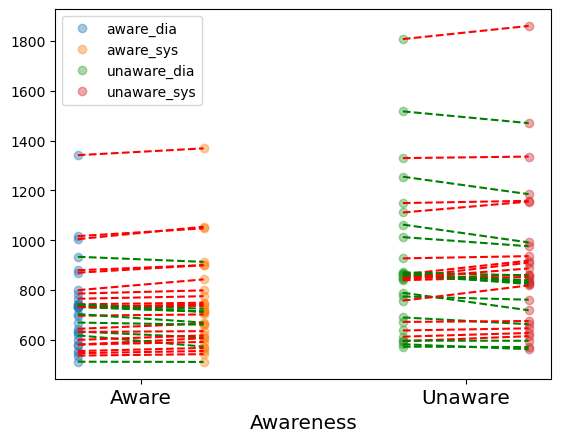

In [95]:
fig,ax= plt.subplots()
x_val=0

for cond,rt in dict_awa_list.items():
    x_arr=np.full(len(rt),x_val+adj_list[x_val])
    ax.plot(x_arr,rt,'o',alpha=.4, label=cond)

    
    x_val+=1
xticklab=['Aware', 'Unaware']
xlab='Awareness'
plt.xticks([0.3,1.85],labels=xticklab,size='x-large')
plt.xlabel(xlab,size='x-large')
ax.legend()
count_awa_dia=0
count_unawa_dia=0
for n, _ in enumerate(rt):
    diff_n_awa=np.array(dict_awa_list['aware_dia'])[n]-np.array(dict_awa_list['aware_sys'])[n]
    diff_n_unawa=dict_awa_list['unaware_dia'][n]-dict_awa_list['unaware_sys'][n]

    if diff_n_awa>0:
        color_line_awa='g'
        count_awa_dia+=1
        
    else:
        color_line_awa='r'
        
    if diff_n_unawa>0:
        color_line_unawa='g'
        count_unawa_dia+=1
    else:
        color_line_unawa='r'        
    
    ax.plot([0+adj_list[0],1+adj_list[1]],[dict_awa_list['aware_dia'][n],dict_awa_list['aware_sys'][n]],color=color_line_awa,linestyle='--')
    ax.plot([2+adj_list[2],3+adj_list[3]],[dict_awa_list['unaware_dia'][n],dict_awa_list['unaware_sys'][n]],color=color_line_unawa,linestyle='--')
    
    
print(f'The number of subjects in the aware condition when they were slower in diastole than sistole is: {count_awa_dia} over 30')
    
print(f'The number of subjects in the unaware condition when they were slower in diastole than sistole is: {count_unawa_dia} over 30')

In [92]:
np.arange(0,2)

array([0, 1])

N of subject that have higher difference between dia and sys in the unaware than aware condition: 15 /30


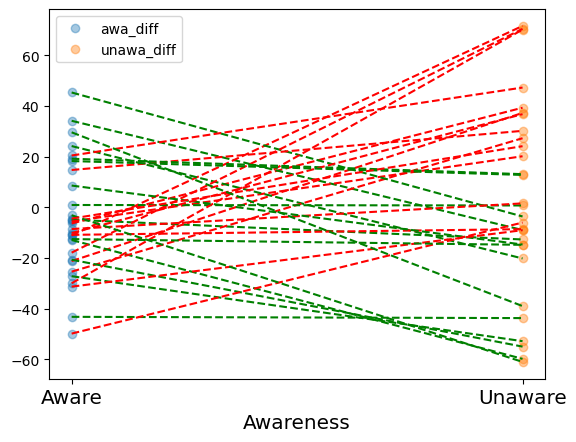

In [106]:
fig,ax= plt.subplots()
x_val=0

rt_awa=np.array(dict_awa_list['aware_dia'])-np.array(dict_awa_list['aware_sys'])
rt_unawa=np.array(dict_awa_list['unaware_dia'])-np.array(dict_awa_list['unaware_sys'])
x_arr_awa=np.full(len(rt_awa),1)
x_arr_unawa=np.full(len(rt_unawa),2)
ax.plot(x_arr_awa,rt_awa,'o',alpha=.4, label='awa_diff')
ax.plot(x_arr_unawa,rt_unawa,'o',alpha=.4, label='unawa_diff')
    
    
xticklab=['Aware', 'Unaware']
xlab='Awareness'
plt.xticks([1,2],labels=xticklab,size='x-large')
plt.xlabel(xlab,size='x-large')
ax.legend()
count_awa_dia=0
for n, _ in enumerate(rt): 
    awa_diff_n=dict_awa_list['aware_dia'][n]-dict_awa_list['aware_sys'][n]
    unawa_diff_n=dict_awa_list['unaware_dia'][n]-dict_awa_list['unaware_sys'][n]
    diff_awareness=awa_diff_n-unawa_diff_n
    if  diff_awareness>0:
            color_line='g'
            count_awa_dia+=1

    else:
        color_line='r'     
    
    ax.plot([1,2],[awa_diff_n,unawa_diff_n],color=color_line,linestyle='--')
  
print(f'N of subject that have higher difference between dia and sys in the unaware than aware condition: {count_awa_dia} /30')

## absolute differences

10


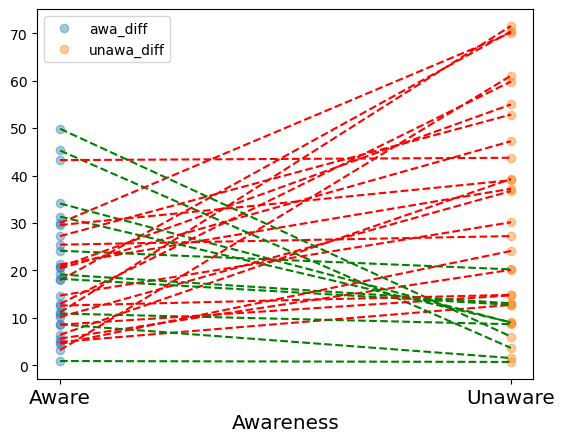

In [111]:
fig,ax= plt.subplots()
x_val=0

rt_awa=np.array(dict_awa_list['aware_dia'])-np.array(dict_awa_list['aware_sys'])
rt_unawa=np.array(dict_awa_list['unaware_dia'])-np.array(dict_awa_list['unaware_sys'])
x_arr_awa=np.full(len(rt_awa),1)
x_arr_unawa=np.full(len(rt_unawa),2)
ax.plot(x_arr_awa,np.abs(rt_awa),'o',alpha=.4, label='awa_diff')
ax.plot(x_arr_unawa,np.abs(rt_unawa),'o',alpha=.4, label='unawa_diff')
    
    
xticklab=['Aware', 'Unaware']
xlab='Awareness'
plt.xticks([1,2],labels=xticklab,size='x-large')
plt.xlabel(xlab,size='x-large')
ax.legend()
count_awa_dia=0
for n, _ in enumerate(rt): 
    awa_diff_n=dict_awa_list['aware_dia'][n]-dict_awa_list['aware_sys'][n]
    unawa_diff_n=dict_awa_list['unaware_dia'][n]-dict_awa_list['unaware_sys'][n]
    diff_awareness=np.abs(awa_diff_n)-np.abs(unawa_diff_n)
    if  diff_awareness>0:
            color_line='g'
            count_awa_dia+=1

    else:
        color_line='r'     
     
    
    ax.plot([1,2],[np.abs(awa_diff_n),np.abs(unawa_diff_n)],color=color_line,linestyle='--')
  
print(count_awa_dia)

# pairplot to see relationhip between diff

In [12]:
awa_sys=pivot_card.loc[(pivot_card['awareness']=='aware') & (pivot_card['cardiac_phase']=='sys')]
awa_sys.reset_index(inplace=True)
unawa_sys=pivot_card.loc[(pivot_card['awareness']=='unaware') & (pivot_card['cardiac_phase']=='sys')]
unawa_sys.reset_index(inplace=True)
awa_dia=pivot_card.loc[(pivot_card['awareness']=='aware') & (pivot_card['cardiac_phase']=='dia')]
awa_dia.reset_index(inplace=True)

unawa_dia=pivot_card.loc[(pivot_card['awareness']=='unaware') & (pivot_card['cardiac_phase']=='dia')]
unawa_dia.reset_index(inplace=True)

In [13]:
df_diff=pd.DataFrame()

In [14]:
df_diff['awa_diff']=awa_dia['RT']-awa_sys['RT']

In [15]:
type(df_diff.awa_diff[0])

numpy.float64

In [16]:
df_diff['unawa_diff']=unawa_dia['RT']-unawa_sys['RT']

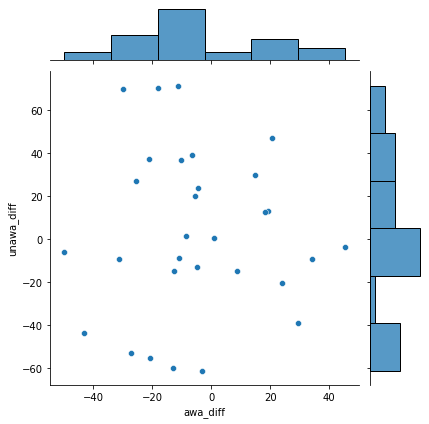

In [48]:
sns.jointplot(data=df_diff,x='awa_diff',y='unawa_diff')

# Stemplot

In [ ]:
x=np.linspace(0.1,2,30)
y_tick=np.linspace(1,30)
df_diff

In [ ]:
y_tick=np.linspace(1,30,30)
y_tick=y_tick.flatten()


In [ ]:
plt.style.use('seaborn')
%matplotlib inline
fig,(ax1,ax2)= plt.subplots(2,1, figsize=(15,8))
ax1.stem(x,df_diff['awa_diff'],orientation='vertical')
ax1.set_xticks(x)
ax1.set_xticklabels(y_tick)
ax1.set_ylim(-75,75)
ax1.set_title('diastole - systole in the aware condition')
ax2.stem(x,df_diff['unawa_diff'],orientation='vertical')
ax2.set_xticks(x)
#ax2.set_xticklabels(y_tick)
ax2.set_ylim(-75,75)
ax2.set_title('diastole - systole in the unaware')

In [ ]:
plt.style.use('seaborn')
%matplotlib inline
fig,ax= plt.subplots(figsize=(15,8))
ax.stem(x,df_diff['awa_diff'],orientation='vertical', label='aware')
ax.stem(x,df_diff['unawa_diff'],'r',markerfmt='ro',orientation='vertical',label='unaware')
ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(y_tick)

In [ ]:
# Add Group variables

In [ ]:
col_dv_group=['RT','RRI','HeartRate_post','HeartRate_rolling_5_before',
              'HeartRate_rolling_5_centered', 'HeartRate_rolling_5_after',
              'HeartRateVar_rolling_10_centered', 'HeartRateVar_rolling_100_centered',
              'HeartRate_precedent', 'inh_stim_int','HeartRate',
              'RSP_Rate_precedent', 'RSP_Rate', 'RSP_Rate_post','R_stim_int',
              'RSP_Rate_rolling_5_before', 'RSP_Rate_rolling_5_centered',
              'RSP_Rate_rolling_5_after', 'RspRateVar_rolling_10_centered',
              'RspRateVar_rolling_100_centered', 'ECG_Phase_Completion_Ventricular', 'ECG_Phase_Completion_Atrial','RSP_Amplitude','rsp_int_inh',
              'TAS-20', 'STAI-Y',
              'NEO-FFI N', 'NEO FFI E', 'NEO FFI O', 'NEO FFI A', 'NEO FFI C', 'BPQ','Age','Sexe: ', 'CACU_corr', 'corr', 'CACU_sys', 'CACU_dia']

In [ ]:
group_df=df.pivot_table(index='g_num',values=col_dv_group)
group_df.reset_index(inplace=True)


In [ ]:
all_df=group_df.merge(df_diff,left_index=True,right_index=True)
all_df['sys_dia_awa_unawa_diff']=all_df['awa_diff']-all_df['unawa_diff']

In [ ]:
corr=all_df.corr()


In [ ]:
all_df.columns

In [ ]:
%matplotlib qt
f,ax=plt.subplots(figsize=(7,20))
ax=sns.heatmap(corr[['sys_dia_awa_unawa_diff','awa_diff','unawa_diff']],annot=True,xticklabels=True, yticklabels=True)
f.tight_layout()

In [ ]:
all_df.rename(columns={'NEO FFI E':'NEO_FFI_E'}, inplace=True)

In [ ]:
all_df['RspRateVar_rolling_100_centered_qcut']=pd.qcut(all_df['RspRateVar_rolling_100_centered'],2,labels=['low','high'])
all_df['NEO_FFI_E_qcut']=pd.qcut(all_df['NEO_FFI_E'],2,labels=['low','high'])

In [ ]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
df

In [ ]:
md=smf.mixedlm("awa_diff~RspRateVar_rolling_100_centered",data=all_df,groups=all_df.index).fit()

In [ ]:
md.summary()

In [ ]:
md=smf.mixedlm("awa_diff~RspRateVar_rolling_100_centered*NEO_FFI_E",data=all_df,groups=all_df.index).fit()
md.summary()

In [ ]:
sns.relplot(data=all_df, x='awa_diff',y='NEO_FFI_E', hue='RspRateVar_rolling_100_centered_qcut')

In [ ]:
%matplotlib inline
sns.catplot(data=all_df, y='awa_diff',x='RspRateVar_rolling_100_centered_qcut',kind='bar')

In [ ]:
sns.catplot(data=all_df, y='awa_diff',x='NEO_FFI_E_qcut',kind='bar')

In [ ]:
sns.catplot(data=all_df, y='awa_diff',x='RspRateVar_rolling_100_centered_qcut',hue='NEO_FFI_E_qcut',kind='box')

In [ ]:
%matplotlib qt
f,ax=plt.subplots(figsize=(7,20))
ax=sns.heatmap(corr[['NEO_FFI_E','RspRateVar_rolling_100_centered']],annot=True,xticklabels=True, yticklabels=True)
f.tight_layout()

[Text(0.1, 0, '1.0'),
 Text(0.16551724137931034, 0, '2.0'),
 Text(0.23103448275862068, 0, '3.0'),
 Text(0.296551724137931, 0, '4.0'),
 Text(0.3620689655172413, 0, '5.0'),
 Text(0.4275862068965517, 0, '6.0'),
 Text(0.49310344827586206, 0, '7.0'),
 Text(0.5586206896551723, 0, '8.0'),
 Text(0.6241379310344827, 0, '9.0'),
 Text(0.689655172413793, 0, '10.0'),
 Text(0.7551724137931034, 0, '11.0'),
 Text(0.8206896551724137, 0, '12.0'),
 Text(0.886206896551724, 0, '13.0'),
 Text(0.9517241379310344, 0, '14.0'),
 Text(1.0172413793103448, 0, '15.0'),
 Text(1.0827586206896551, 0, '16.0'),
 Text(1.1482758620689655, 0, '17.0'),
 Text(1.2137931034482758, 0, '18.0'),
 Text(1.2793103448275862, 0, '19.0'),
 Text(1.3448275862068966, 0, '20.0'),
 Text(1.410344827586207, 0, '21.0'),
 Text(1.475862068965517, 0, '22.0'),
 Text(1.5413793103448274, 0, '23.0'),
 Text(1.6068965517241378, 0, '24.0'),
 Text(1.6724137931034482, 0, '25.0'),
 Text(1.7379310344827585, 0, '26.0'),
 Text(1.803448275862069, 0, '27.0'),
 

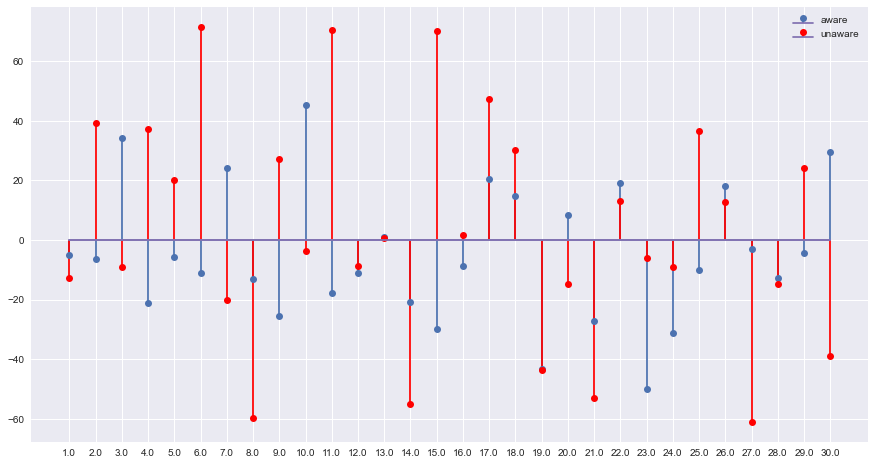

In [39]:
plt.style.use('seaborn')
%matplotlib inline
fig,ax= plt.subplots(figsize=(15,8))
ax.stem(x,df_diff['awa_diff'],orientation='vertical', label='aware')
ax.stem(x,df_diff['unawa_diff'],'r',markerfmt='ro',orientation='vertical',label='unaware')
ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(y_tick)

In [ ]:
# Add Group variables

In [17]:
col_dv_group=['RT','RRI','HeartRate_post','HeartRate_rolling_5_before',
              'HeartRate_rolling_5_centered', 'HeartRate_rolling_5_after',
              'HeartRateVar_rolling_10_centered', 'HeartRateVar_rolling_100_centered',
              'HeartRate_precedent', 'inh_stim_int','HeartRate',
              'RSP_Rate_precedent', 'RSP_Rate', 'RSP_Rate_post','R_stim_int',
              'RSP_Rate_rolling_5_before', 'RSP_Rate_rolling_5_centered',
              'RSP_Rate_rolling_5_after', 'RspRateVar_rolling_10_centered',
              'RspRateVar_rolling_100_centered', 'ECG_Phase_Completion_Ventricular', 'ECG_Phase_Completion_Atrial','RSP_Amplitude','rsp_int_inh',
              'TAS-20', 'STAI-Y',
              'NEO-FFI N', 'NEO FFI E', 'NEO FFI O', 'NEO FFI A', 'NEO FFI C', 'BPQ','Age','Sexe: ', 'CACU_corr', 'corr', 'CACU_sys', 'CACU_dia']

In [18]:
group_df=df.pivot_table(index='g_num',values=col_dv_group)
group_df.reset_index(inplace=True)


In [19]:
all_df=group_df.merge(df_diff,left_index=True,right_index=True)
all_df['sys_dia_awa_unawa_diff']=all_df['awa_diff']-all_df['unawa_diff']

In [44]:
corr=all_df.corr()


In [33]:
all_df.columns

Index(['g_num', 'Age', 'BPQ', 'CACU_corr', 'CACU_dia', 'CACU_sys',
       'ECG_Phase_Completion_Atrial', 'ECG_Phase_Completion_Ventricular',
       'HeartRate', 'HeartRateVar_rolling_100_centered',
       'HeartRateVar_rolling_10_centered', 'HeartRate_post',
       'HeartRate_precedent', 'HeartRate_rolling_5_after',
       'HeartRate_rolling_5_before', 'HeartRate_rolling_5_centered',
       'NEO FFI A', 'NEO FFI C', 'NEO FFI E', 'NEO FFI O', 'NEO-FFI N', 'RRI',
       'RSP_Amplitude', 'RSP_Rate', 'RSP_Rate_post', 'RSP_Rate_precedent',
       'RSP_Rate_rolling_5_after', 'RSP_Rate_rolling_5_before',
       'RSP_Rate_rolling_5_centered', 'RT', 'R_stim_int',
       'RspRateVar_rolling_100_centered', 'RspRateVar_rolling_10_centered',
       'STAI-Y', 'TAS-20', 'corr', 'inh_stim_int', 'rsp_int_inh', 'awa_diff',
       'unawa_diff', 'sys_dia_awa_unawa_diff',
       'RspRateVar_rolling_100_centered_qcut'],
      dtype='object')

In [71]:
%matplotlib qt
f,ax=plt.subplots(figsize=(7,20))
ax=sns.heatmap(corr[['sys_dia_awa_unawa_diff','awa_diff','unawa_diff']],annot=True,xticklabels=True, yticklabels=True)
f.tight_layout()

In [37]:
all_df.rename(columns={'NEO FFI E':'NEO_FFI_E'}, inplace=True)

In [67]:
all_df['RspRateVar_rolling_100_centered_qcut']=pd.qcut(all_df['RspRateVar_rolling_100_centered'],2,labels=['low','high'])
all_df['NEO_FFI_E_qcut']=pd.qcut(all_df['NEO_FFI_E'],2,labels=['low','high'])

In [21]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [23]:
df

,TF,RT,difficulty,accuracy,awareness,cardiac_phase,RRI,HeartRate,HeartRate_post,HeartRate_rolling_5_before,...,NEO FFI C,BPQ,Code,Sexe:,Age,mod_Z,log_norm,Zscore,rsp_int_inh,inh_dur
5,27418,792.781250,normal,correct,aware,sys,1.042969,57.528090,57.962264,58.869106,...,3.00,109.0,MQ50,M,24.0,0.479121,6.675547,0.382787,2.874023,1.235352
6,30055,916.804688,normal,correct,aware,dia,1.016602,59.020173,60.117417,59.008868,...,3.00,109.0,MQ50,M,24.0,1.069882,6.820894,0.947996,4.207031,1.984375
7,32735,874.812500,normal,correct,aware,sys,1.056641,56.783734,63.602484,58.479575,...,3.00,109.0,MQ50,M,24.0,0.869860,6.774010,0.756626,4.207031,1.984375
10,39288,542.781250,normal,correct,aware,dia,1.026367,58.458611,59.419729,60.315445,...,3.00,109.0,MQ50,M,24.0,-0.711704,6.296706,-0.756532,3.726562,1.624023
11,41558,484.187500,normal,correct,aware,dia,0.959961,62.502543,58.738050,60.839706,...,3.00,109.0,MQ50,M,24.0,-0.990804,6.182472,-1.023560,3.437500,1.316406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25507,4363496,1158.992188,normal,correct,unaware,dia,0.706055,84.979253,85.690377,82.822591,...,1.75,62.0,MQ108,F,26.0,2.141631,7.055306,0.919909,3.587891,1.655273
25508,4366363,800.593750,normal,correct,aware,dia,0.757812,79.175258,80.629921,82.922684,...,1.75,62.0,MQ108,F,26.0,0.334784,6.685354,-0.147616,3.673828,1.654297
25509,4369094,874.812500,normal,correct,unaware,sys,0.764648,78.467433,82.580645,79.843252,...,1.75,62.0,MQ108,F,26.0,0.708954,6.774010,0.073452,3.673828,1.654297
25510,4371159,933.406250,normal,correct,unaware,sys,0.706055,84.979253,81.269841,82.374446,...,1.75,62.0,MQ108,F,26.0,1.004351,6.838841,0.247979,3.115234,1.187500


In [26]:
md=smf.mixedlm("awa_diff~RspRateVar_rolling_100_centered",data=all_df,groups=all_df.index).fit()

/Applications/anaconda3/envs/mne/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [27]:
md.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Mixed Linear Model Regression Results
=============================================================================
Model:                    MixedLM        Dependent Variable:        awa_diff 
No. Observations:         30             Method:                    REML     
No. Groups:               30             Scale:                     213.4357 
Min. group size:          1              Log-Likelihood:            -128.8296
Max. group size:          1              Converged:                 Yes      
Mean group size:          1.0                                                
-----------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
-----------------------------------------------------------------------------
Intercept                       -24.322    2.972 -8.185 0.000 -30.147 -18.498
RspRateVar_rolling_100_centered   4.131    0.164 25.124 0.000   3.808   4.453
Group Var                       213.436                                      
=============================================================================

"""

In [38]:
md=smf.mixedlm("awa_diff~RspRateVar_rolling_100_centered*NEO_FFI_E",data=all_df,groups=all_df.index).fit()
md.summary()

/Applications/anaconda3/envs/mne/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Mixed Linear Model Regression Results
==========================================================================================
Model:                         MixedLM            Dependent Variable:            awa_diff 
No. Observations:              30                 Method:                        REML     
No. Groups:                    30                 Scale:                         207.6681 
Min. group size:               1                  Log-Likelihood:                -122.3419
Max. group size:               1                  Converged:                     Yes      
Mean group size:               1.0                                                        
------------------------------------------------------------------------------------------
                                           Coef.   Std.Err.    z    P>|z|  [0.025   0.975]
------------------------------------------------------------------------------------------
Intercept                                 -105.118    6.068 -17.325 0.000 -117.010 -93.226
RspRateVar_rolling_100_centered             16.094    2.758   5.835 0.000   10.689  21.499
NEO_FFI_E                                   30.909    4.700   6.576 0.000   21.696  40.122
RspRateVar_rolling_100_centered:NEO_FFI_E   -4.393    1.024  -4.289 0.000   -6.401  -2.386
Group Var                                  207.668                                        
==========================================================================================

"""

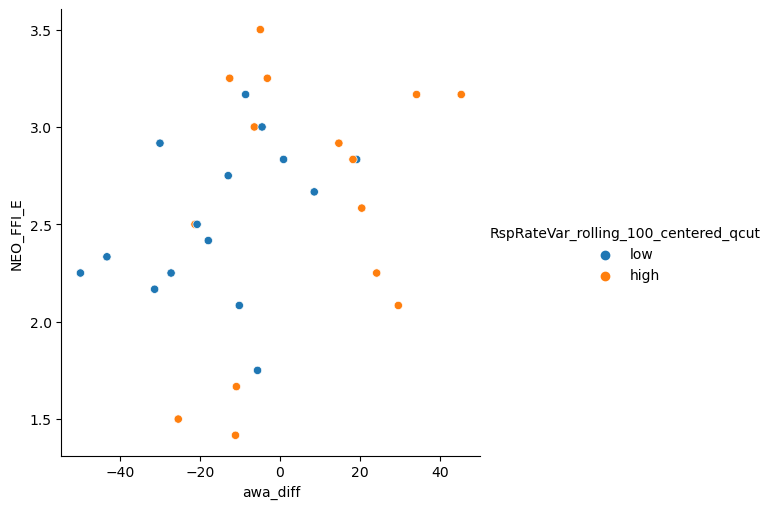

In [42]:
sns.relplot(data=all_df, x='awa_diff',y='NEO_FFI_E', hue='RspRateVar_rolling_100_centered_qcut')

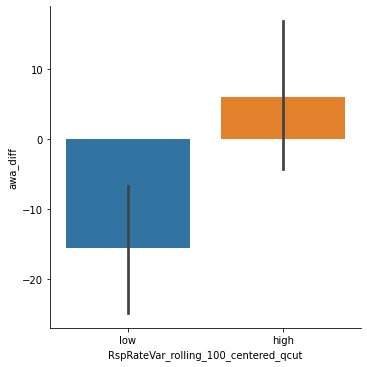

In [68]:
%matplotlib inline
sns.catplot(data=all_df, y='awa_diff',x='RspRateVar_rolling_100_centered_qcut',kind='bar')

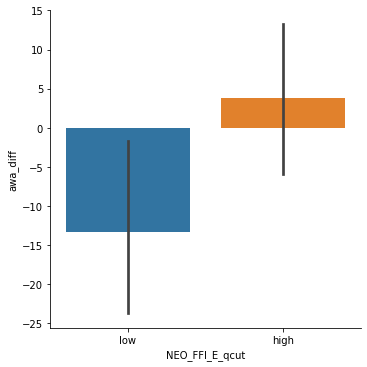

In [69]:
sns.catplot(data=all_df, y='awa_diff',x='NEO_FFI_E_qcut',kind='bar')

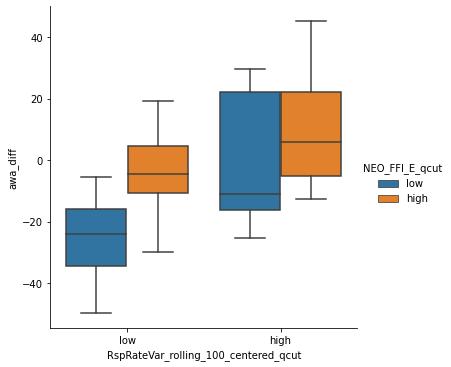

In [70]:
sns.catplot(data=all_df, y='awa_diff',x='RspRateVar_rolling_100_centered_qcut',hue='NEO_FFI_E_qcut',kind='box')

In [45]:
%matplotlib qt
f,ax=plt.subplots(figsize=(7,20))
ax=sns.heatmap(corr[['NEO_FFI_E','RspRateVar_rolling_100_centered']],annot=True,xticklabels=True, yticklabels=True)
f.tight_layout()